In [1]:
state = 'WV' 
year = 2010
obj_type = 'cut_edges'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 3 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from WV_plans_2010 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 0 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method

(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )

####################################################################################################
Running epsilon constraint method for state WV, objective cut_edges
####################################################################################################

L = 611489 and U = 623841

****************************************
Trying deviation = 6176.6466666666665
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 611489 and U = 623841
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parame

Model fingerprint: 0x6468fb27
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]
Presolve removed 1089 rows and 831 columns
Presolve time: 0.01s
Presolved: 1079 rows, 994 columns, 3621 nonzeros
Variable types: 0 continuous, 994 integer (988 binary)

Root relaxation: objective 8.253760e+00, 887 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.25376    0  183          -    8.25376      -     -    0s
     0     0    8.96454    0  191          -    8.96454      -     -    0s
     0     0    9.33833    0  197          -    9.33833      -     -    0s
     0     0    9.37423    0  198          -    9.37423      -     -    0s
     0     0    9.38430    0  204         


     0     0    8.25670    0  183          -    8.25670      -     -    0s
     0     0    9.01360    0  196          -    9.01360      -     -    0s
     0     0    9.03415    0  199          -    9.03415      -     -    0s
     0     0    9.24154    0  200          -    9.24154      -     -    0s
     0     0    9.26073    0  203          -    9.26073      -     -    0s
     0     0    9.26073    0  204          -    9.26073      -     -    0s
     0     0    9.27768    0  206          -    9.27768      -     -    0s
     0     0    9.29749    0  203          -    9.29749      -     -    0s
     0     0    9.37953    0  204          -    9.37953      -     -    0s
     0     0    9.40901    0  214          -    9.40901      -     -    0s
     0     0    9.41173    0  214          -    9.41173      -     -    0s
     0     2    9.46382    0  214          -    9.46382      -     -    0s
H 1992  1574                      40.0000000   15.32491  61.7%  45.7    2s
H 2229  1666            

     0     0    9.33376    0  205          -    9.33376      -     -    0s
     0     0    9.39096    0  207          -    9.39096      -     -    0s
     0     0    9.42816    0  209          -    9.42816      -     -    0s
     0     0    9.50764    0  216          -    9.50764      -     -    0s
     0     0    9.52327    0  222          -    9.52327      -     -    0s
     0     0    9.52353    0  224          -    9.52353      -     -    0s
     0     0    9.52612    0  224          -    9.52612      -     -    0s
     0     2    9.59724    0  224          -    9.59724      -     -    0s
  6498  4064   27.29373   25  166          -   18.65346      -  45.2    5s
H 9837  3099                      33.0000000   19.65278  40.4%  42.9    6s
H 9953  2381                      31.0000000   19.65278  36.6%  42.9    6s
H10076  2122                      30.0000000   19.65278  34.5%  42.9    6s
H11239  1251                      27.0000000   21.32156  21.0%  43.5    6s
H11240  1088             


Cutting planes:
  Lazy constraints: 193

Explored 24087 nodes (1083993 simplex iterations) in 10.93 seconds (6.64 work units)
Thread count was 20 (of 20 available processors)

Solution count 4: 27 28 29 30 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.700000000000e+01, best bound 2.700000000000e+01, gap 0.0000%

User-callback calls 49334, time in user-callback 1.24 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[1, 8, 12, 15, 18, 25, 28, 36, 38, 40, 44, 53], [0, 2, 4, 5, 6, 10, 11, 14, 16, 17, 20, 29, 30, 31, 32, 33, 35, 41, 48, 49, 50, 51], [3, 7, 9, 13, 19, 21, 22, 23, 24, 26, 27, 34, 37, 39, 42, 43, 45, 46, 47, 52, 54]]

****************************************
Trying deviation = 1324.1666666667054
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 616341 and 

Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 2168 rows, 1825 columns and 7001 nonzeros
Model fingerprint: 0x8da99912
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]
Presolve removed 1133 rows and 833 columns
Presolve time: 0.02s
Presolved: 1035 rows, 992 columns, 3530 nonzeros
Variable types: 0 co

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 2168 rows, 1825 columns and 7001 nonzeros
Model fingerprint: 0xb459723f
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]
Presolve removed 1134 rows and 835 columns
Presolve time: 0.01s
Presolved: 1034 rows, 990 columns, 3521 nonzeros
Variable types: 0 continuous, 990 integer (986 binary)

Root relaxation: objective 8.953980e+

Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 2168 rows, 1825 columns and 7001 nonzeros
Model fingerprint: 0x11615edd
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]
Presolve removed 1133 rows and 833 columns
Presolve time: 0.03s
Presolved: 1035 rows, 992 columns, 3530 nonzeros
Variable types: 0 co

 367991 233768   40.09517   41   41          -   26.69874      -  35.7   90s
H371249 48372                      33.0000000   26.71122  19.1%  35.8   91s
H379265 36035                      32.0000000   26.90506  15.9%  35.8   94s
 379375 36026   27.87406   34  111   32.00000   26.90819  15.9%  35.8   95s
 388315 35632   27.67936   32   95   32.00000   26.99551  15.6%  35.9  100s
 401934 34204     cutoff   34        32.00000   27.48762  14.1%  36.0  105s
 417832 31947   28.82570   38   78   32.00000   28.00000  12.5%  36.0  110s
 435109 27692   29.06975   30  149   32.00000   28.44630  11.1%  36.1  115s
 451271 21768     cutoff   40        32.00000   29.00000  9.38%  36.1  120s
 472555  5582 infeasible   41        32.00000   30.19111  5.65%  35.8  125s

Cutting planes:
  Lazy constraints: 496

Explored 481021 nodes (17044125 simplex iterations) in 126.98 seconds (73.80 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 32 33 

Optimal solution found (toleranc

     0     0   10.25832    0  209          -   10.25832      -     -    0s
     0     0   10.26289    0  209          -   10.26289      -     -    0s
     0     0   10.26289    0  209          -   10.26289      -     -    0s
     0     0   10.26289    0  209          -   10.26289      -     -    0s
     0     2   10.31844    0  209          -   10.31844      -     -    0s
 10511  7197   53.83048   62   33          -   20.59153      -  39.4    5s
 31201 22376   45.74299   51  181          -   22.29697      -  35.9   10s
 53196 38867   38.76021   48   58          -   23.12542      -  35.4   15s
 77610 54326   37.20884   44   53          -   23.64546      -  35.0   20s
 101450 70596   37.86447   48   56          -   24.01304      -  35.0   25s
 128141 88254   25.44751   40   70          -   24.35239      -  34.8   30s
 151579 104086   42.39538   58   32          -   24.61071      -  35.0   35s
 176160 120607   36.37920   49   39          -   24.86153      -  34.9   40s
 196429 133652   49

 254264 178467   35.70871   43   41          -   24.10211      -  35.9  105s
 267713 186211   34.67179   38   45          -   24.18210      -  35.9  111s
 270329 188478   28.25835   38   93          -   24.19269      -  35.9  115s
 281025 196932   33.86788   34  245          -   24.24252      -  35.9  120s
 291724 204169   35.16063   45   98          -   24.27263      -  35.9  125s
 301451 210438   30.23430   44   50          -   24.32088      -  35.9  130s
 313270 218017 infeasible   54               -   24.36728      -  35.9  135s
 328155 226345   35.28652   43   83          -   24.41900      -  35.7  140s
 338579 234302   43.35079   41   46          -   24.45628      -  35.6  145s
 350344 242343   37.81417   43  123          -   24.49759      -  35.6  151s
 362677 248622   29.43792   31  111          -   24.53850      -  35.5  156s
 369612 254686   35.47146   60   64          -   24.56286      -  35.5  160s
 382099 262768   43.82331   51   52          -   24.59611      -  35.3  165s

 1503813 965518   30.03988   33  248          -   26.72679      -  34.5  635s
 1511569 970402   29.93823   35  119          -   26.73752      -  34.5  640s
 1521463 976328 infeasible   37               -   26.75269      -  34.5  645s
 1536039 985105 infeasible   41               -   26.77375      -  34.5  650s
 1543335 989556   32.63908   35  202          -   26.78404      -  34.5  655s
 1552201 994765   37.18228   55   44          -   26.79349      -  34.5  660s
 1566591 1003005   31.76815   32  181          -   26.81285      -  34.5  665s
 1573969 1007590   32.50545   43   65          -   26.82677      -  34.5  670s
 1582602 1013095   52.40244   55   86          -   26.83586      -  34.5  675s
 1596034 1021052   30.00144   36   70          -   26.85647      -  34.5  680s
 1604267 1025588   52.96337   46   92          -   26.86603      -  34.5  685s
 1613041 1031060   31.02137   38  144          -   26.88007      -  34.5  691s
 1621601 1035446   41.18250   44  107          -   26.8920

 2435157 1505085   29.83761   29   22          -   27.75345      -  35.2 1155s
 2440903 1508187   40.63421   56   85          -   27.75844      -  35.2 1160s
 2456778 1517097 infeasible   58               -   27.77525      -  35.2 1165s
 2463571 1519982   33.09143   43   45          -   27.78097      -  35.2 1170s
 2467499 1523149 infeasible   53               -   27.78607      -  35.2 1175s
 2476585 1528234   64.66997   50   88          -   27.79540      -  35.2 1180s
 2493349 1537730   32.70186   37  159          -   27.81235      -  35.2 1185s
 2497886 1540254   44.68570   41  136          -   27.81619      -  35.2 1190s
 2504902 1544219   28.92443   37   84          -   27.82383      -  35.2 1196s
 2510549 1547353 infeasible   55               -   27.82903      -  35.2 1200s
 2519722 1552691   40.73178   44   36          -   27.83924      -  35.2 1205s
 2527099 1556832   46.40378   47   93          -   27.84705      -  35.2 1210s
 2534055 1561068   36.70958   36  175          -   2

 3266427 1964443   41.76773   38  151          -   28.42163      -  35.6 1676s
 3271956 1967284   47.05051   59   28          -   28.42575      -  35.6 1680s
 3276076 1969631   49.72417   50   82          -   28.42847      -  35.6 1686s
 3283334 1973535   59.19588   42  103          -   28.43404      -  35.6 1690s
 3297909 1980965   29.19289   33  213          -   28.44483      -  35.6 1697s
 3299939 1982931   51.44461   52  124          -   28.44661      -  35.6 1700s
 3309035 1987538   43.46759   42  141          -   28.45286      -  35.6 1706s
 3317987 1992492   32.64102   36   33          -   28.45979      -  35.6 1710s
 3324241 1995711   39.39048   53   71          -   28.46400      -  35.6 1715s
 3331558 1999779   37.43109   36  126          -   28.46942      -  35.6 1720s
 3338144 2003643   63.82465   62   38          -   28.47478      -  35.6 1725s
 3346004 2006775 infeasible   51               -   28.47966      -  35.6 1732s
 3347907 2008609   38.86811   34  260          -   2

 3987194 2352540   38.30846   32  169          -   28.94048      -  35.9 2201s
 3994235 2355773   38.39705   44   82          -   28.94539      -  35.9 2207s
 3996501 2357379   49.15141   53   30          -   28.94667      -  35.9 2210s
 4003838 2361608 infeasible   43               -   28.95188      -  35.9 2216s
 4009442 2364611   32.38052   37  154          -   28.95502      -  35.9 2220s
 4018261 2368668   40.65231   50   63          -   28.96149      -  35.9 2231s
 4023340 2372256   50.50000   55   44          -   28.96526      -  35.9 2236s
 4030275 2376288   37.23611   40  117          -   28.96979      -  35.9 2240s
 4042833 2382738   35.97650   33  228          -   28.97980      -  35.9 2245s
 4050186 2386473 infeasible   56               -   28.98495      -  35.9 2251s
 4057567 2390358   32.94166   45   42          -   28.99082      -  35.9 2256s
 4061099 2391482 infeasible   49               -   28.99328      -  35.9 2262s
 4064298 2394007   44.88924   43  133          -   2

 4654458 2704383   33.92565   46   82          -   29.30848      -  36.1 2760s
 4662035 2708325   44.57130   53   58          -   29.31241      -  36.1 2766s
 4667636 2711132   47.74136   39  190          -   29.31603      -  36.1 2770s
 4671245 2712639   39.00000   49   22          -   29.31823      -  36.1 2776s
 4677054 2716201   52.96500   56   62          -   29.32122      -  36.1 2780s
 4683205 2719352   54.86355   50  144          -   29.32516      -  36.1 2785s
 4690426 2722191   48.24228   45   43          -   29.32916      -  36.1 2799s
 4690503 2723071 infeasible   45               -   29.32953      -  36.1 2801s
 4695942 2726003   37.00000   45   28          -   29.33287      -  36.2 2805s
 4702802 2729582   41.17332   50  119          -   29.33613      -  36.2 2810s
 4712230 2734372   53.31775   56   68          -   29.34234      -  36.2 2815s
 4721450 2738855   35.19350   43  131          -   29.34768      -  36.2 2820s
 4728696 2743005 infeasible   49               -   2

 5305234 3038918   43.67015   51  103          -   29.66025      -  36.3 3377s
 5307388 3040848   44.41425   46  130          -   29.66158      -  36.3 3380s
 5315206 3044490   53.47059   50   41          -   29.66604      -  36.3 3386s
 5322419 3047919   32.40026   45   50          -   29.66967      -  36.3 3390s
 5330101 3052064   36.56879   33  245          -   29.67390      -  36.3 3396s
 5335295 3054376   49.31665   43   84          -   29.67635      -  36.3 3405s
 5339793 3057233   51.42890   54   64          -   29.67843      -  36.3 3410s
 5346897 3060893 infeasible   59               -   29.68217      -  36.3 3415s
 5353783 3063714   50.10702   41   66          -   29.68585      -  36.3 3431s
 5358130 3066562   40.30716   52   51          -   29.68832      -  36.3 3435s
 5367329 3071292   33.83075   35  149          -   29.69343      -  36.3 3440s
 5372631 3073830   34.78528   30  238          -   29.69681      -  36.3 3445s
 5379521 3077523   33.50347   43  121          -   2

 5892833 3339130 infeasible   42               -   29.96933      -  36.4 4020s
 5902718 3344798   47.81709   38  209          -   29.97473      -  36.4 4026s
 5906340 3346619   46.79257   48   83          -   29.97660      -  36.4 4030s
 5911788 3349425   39.75844   49   14          -   29.97964      -  36.4 4035s
 5913707 3349582   35.88725   34  284          -   29.98041      -  36.4 4050s
 5917659 3352426   43.01748   40   97          -   29.98279      -  36.4 4055s
 5924858 3356172   50.00000   45   15          -   29.98645      -  36.4 4060s
 5930653 3358929   38.30439   44   24          -   29.98986      -  36.4 4065s
 5938191 3362684   36.92789   37   78          -   29.99371      -  36.4 4070s
 5947318 3366662   32.19992   36  157          -   29.99860      -  36.4 4085s
 5953535 3370409   43.31484   50   85          -   30.00000      -  36.4 4090s
 5963597 3374867   42.21004   42   85          -   30.00000      -  36.4 4096s
 5969365 3377656   39.53906   33  144          -   3

 6338688 1587037   34.85110   37   57   41.00000   30.15845  26.4%  36.5 4706s
 6338717 1587039 infeasible   38        41.00000   30.15999  26.4%  36.5 4714s
 6338754 1587042   37.16445   39   79   41.00000   30.15999  26.4%  36.5 4717s
 6338791 1587056   37.44590   40  103   41.00000   30.15999  26.4%  36.5 4723s
 6338824 1587059   37.48609   41   72   41.00000   30.15999  26.4%  36.5 4731s
 6338861 1587074   37.87057   42   67   41.00000   30.16003  26.4%  36.5 4738s
 6338888 1587079   37.91513   43   45   41.00000   30.16004  26.4%  36.5 4746s
 6338975 1587082   38.78922   45  120   41.00000   30.16004  26.4%  36.5 4753s
 6339003 1587072   38.93226   46   48   41.00000   30.16004  26.4%  36.5 4760s
 6339057 1587079 infeasible   47        41.00000   30.16031  26.4%  36.5 4768s
 6339090 1587096 infeasible   48        41.00000   30.16031  26.4%  36.5 4774s
 6339113 1587108   32.06512   49  120   41.00000   30.16031  26.4%  36.5 4778s
 6339141 1587119     cutoff   50        41.00000   3

 6429025 1603917   36.93722   46  106   41.00000   30.26442  26.2%  36.5 5328s
 6429769 1604204   34.71540   42   92   41.00000   30.26527  26.2%  36.5 5331s
 6431139 1604515 infeasible   46        41.00000   30.26745  26.2%  36.5 5335s
 6432438 1604609   34.69965   40  112   41.00000   30.26867  26.2%  36.5 5343s
 6433006 1604860 infeasible   50        41.00000   30.26911  26.2%  36.5 5347s
 6434432 1605114   33.72728   31  235   41.00000   30.27144  26.2%  36.5 5350s
 6436545 1605508   37.88230   49   34   41.00000   30.27342  26.2%  36.5 5357s
 6437873 1605785   33.22260   42   85   41.00000   30.27571  26.2%  36.5 5363s
 6439152 1605931   35.54675   34  194   41.00000   30.27668  26.2%  36.5 5371s
 6439724 1606157   32.63193   33  157   41.00000   30.27720  26.2%  36.5 5375s
 6442457 1606426   38.81081   49  120   41.00000   30.28027  26.1%  36.5 5382s
 6443024 1606663   34.32658   37  162   41.00000   30.28142  26.1%  36.5 5386s
 6444432 1606924   37.14412   44  120   41.00000   3

 6740827 1659051 infeasible   44        41.00000   30.60537  25.4%  36.6 5861s
 6745424 1659953   38.84092   38   28   41.00000   30.61078  25.3%  36.6 5865s
 6749801 1660840   39.00000   45   27   41.00000   30.61515  25.3%  36.6 5871s
 6751430 1660893     cutoff   40        41.00000   30.61700  25.3%  36.6 5879s
 6751767 1661110   38.20478   37  112   41.00000   30.61700  25.3%  36.6 5884s
 6752734 1661402   38.65730   54   27   41.00000   30.61765  25.3%  36.6 5886s
 6755612 1661936     cutoff   40        41.00000   30.62040  25.3%  36.6 5891s
 6761650 1663087   31.38533   33  136   41.00000   30.62810  25.3%  36.6 5897s
 6764739 1663571 infeasible   39        41.00000   30.63149  25.3%  36.6 5901s
 6767779 1664111     cutoff   35        41.00000   30.63468  25.3%  36.6 5906s
 6771002 1664713     cutoff   45        41.00000   30.63751  25.3%  36.6 5911s
 6774281 1665288   31.67014   43   66   41.00000   30.64111  25.3%  36.6 5915s
 6777380 1665876   37.48646   43  121   41.00000   3

 7081602 1720676   31.94521   47   56   41.00000   30.94449  24.5%  36.7 6390s
 7084710 1721301   34.82136   40  139   41.00000   30.94811  24.5%  36.7 6395s
 7088058 1721838 infeasible   50        41.00000   30.95072  24.5%  36.7 6400s
 7091383 1722443   35.57347   38  211   41.00000   30.95393  24.5%  36.7 6405s
 7097892 1723729 infeasible   46        41.00000   30.95959  24.5%  36.7 6412s
 7099473 1723987   32.01955   40   44   41.00000   30.96102  24.5%  36.7 6415s
 7102606 1724590   33.49728   38  225   41.00000   30.96389  24.5%  36.7 6420s
 7105928 1725177   32.59955   43  122   41.00000   30.96705  24.5%  36.7 6425s
 7109060 1725823   36.68879   51   35   41.00000   30.97012  24.5%  36.7 6430s
 7113950 1726863   37.59263   35  182   41.00000   30.97426  24.5%  36.7 6435s
 7117106 1727445   32.02465   35  226   41.00000   30.97727  24.4%  36.7 6440s
 7120325 1728131 infeasible   51        41.00000   30.98010  24.4%  36.7 6445s
 7123650 1728697   38.03415   43  219   41.00000   3

 7437416 1786836   33.52134   38   46   41.00000   31.19591  23.9%  36.7 6917s
 7440909 1787532   33.80997   34  187   41.00000   31.19858  23.9%  36.7 6920s
 7446298 1788322   37.36668   44   79   41.00000   31.20201  23.9%  36.7 6927s
 7447948 1788507 infeasible   50        41.00000   31.20343  23.9%  36.7 6930s
 7451238 1789012   32.03714   38   70   41.00000   31.20578  23.9%  36.7 6935s
 7454449 1789564   36.97257   35  163   41.00000   31.20807  23.9%  36.7 6940s
 7458022 1790221   34.52259   34  131   41.00000   31.21079  23.9%  36.7 6945s
 7461258 1790694   32.91110   35  132   41.00000   31.21294  23.9%  36.7 6951s
 7464627 1791259   37.70265   46   49   41.00000   31.21528  23.9%  36.7 6955s
 7469723 1792020   33.99002   45  151   41.00000   31.21893  23.9%  36.7 6960s
 7473311 1792636   37.03888   35  223   41.00000   31.22161  23.8%  36.7 6965s
 7476778 1793188   38.20261   41   93   41.00000   31.22418  23.8%  36.7 6971s
 7480163 1793732 infeasible   59        41.00000   3

 126944 92995   40.55538   56   48          -   23.54664      -  36.2   65s
 136597 98983   24.47232   38  129          -   23.61987      -  35.8   70s
 149690 107980   39.16429   39   48          -   23.75971      -  35.5   75s
 163095 116982   45.11203   48  137          -   23.86587      -  35.2   80s
 173889 124735   26.14917   42   24          -   23.95811      -  35.0   85s
 186961 132972   35.53102   46  100          -   24.00136      -  34.8   90s
 202372 142927   33.43318   48   97          -   24.09115      -  34.6   96s
 210553 148546   27.42347   28  105          -   24.12612      -  34.5  100s
 223120 157185   27.46068   28  119          -   24.18754      -  34.3  106s
 236244 165251   27.83023   29  184          -   24.24848      -  34.1  110s
 247276 172483   41.46819   47  113          -   24.29588      -  34.0  115s
 261752 181835   32.02797   27  214          -   24.37128      -  33.8  120s
 270580 187998   29.82351   25  150          -   24.41761      -  33.8  126s
 

 1378027 895012 infeasible   49               -   27.00000      -  33.3  595s
 1392335 904203   27.60607   32   86          -   27.00001      -  33.4  600s
 1398506 908428   34.86534   41  186          -   27.00585      -  33.4  605s
 1408189 914448   40.16044   36   56          -   27.01974      -  33.4  611s
 1423882 924388   31.68221   38   94          -   27.04110      -  33.4  615s
 1440927 933742   36.29031   44   87          -   27.06082      -  33.4  622s
 1444788 937260   35.12710   37   61          -   27.06467      -  33.4  626s
 1453015 941771   43.92695   41   62          -   27.07131      -  33.4  630s
 1476890 956851   33.82848   28  182          -   27.10065      -  33.4  635s
 1486559 963206 infeasible   47               -   27.11070      -  33.4  640s
 1491624 965978   32.64616   35   90          -   27.11712      -  33.4  645s
 1499912 971060   30.39308   34  231          -   27.12596      -  33.4  650s
 1522226 983953   34.27302   44  147          -   27.15153      

 2408961 1514718   38.83001   44   70          -   28.02899      -  33.5 1115s
 2415002 1518399   37.84086   38   48          -   28.03391      -  33.5 1120s
 2422770 1522545   58.22291   61   38          -   28.04060      -  33.5 1125s
 2430882 1527289   45.69226   48  158          -   28.04660      -  33.5 1130s
 2444084 1534001 infeasible   39               -   28.05708      -  33.5 1137s
 2447924 1537234   40.97953   47   89          -   28.05889      -  33.5 1140s
 2455529 1541859   33.36800   45   98          -   28.06639      -  33.5 1145s
 2463360 1546235   41.74291   37  258          -   28.07330      -  33.5 1150s
 2477064 1554195   38.57063   34  235          -   28.08385      -  33.5 1155s
 2478848 1555311   39.57340   33  139          -   28.08505      -  33.5 1160s
 2485647 1559525   41.86918   50   67          -   28.09009      -  33.5 1165s
 2493989 1563659   40.43937   46   57          -   28.09473      -  33.5 1170s
 2505451 1570389 infeasible   53               -   2

 3271856 2002676   40.12496   53   51          -   28.67327      -  33.7 1635s
 3288352 2011161   42.90787   62   36          -   28.68574      -  33.7 1643s
 3290527 2013094   35.21854   49   28          -   28.68720      -  33.7 1645s
 3298072 2017382   31.53165   26  222          -   28.69203      -  33.7 1650s
 3305660 2021619   32.00000   28   85          -   28.69848      -  33.7 1656s
 3315017 2027042   42.12138   38  114          -   28.70544      -  33.7 1660s
 3321365 2030464   49.99062   32  209          -   28.70971      -  33.7 1666s
 3326756 2033530 infeasible   38               -   28.71351      -  33.7 1670s
 3332415 2036702   33.02008   43  148          -   28.71709      -  33.7 1675s
 3340013 2040993   52.71302   52  113          -   28.72239      -  33.7 1680s
 3350415 2046647   42.86681   47   91          -   28.73011      -  33.7 1685s
 3361830 2053043   35.52685   50   29          -   28.73815      -  33.7 1690s
 3365573 2055546   36.74561   43   28          -   2

 4029262 2423760   37.53404   30  196          -   29.14525      -  33.9 2165s
 4040422 2430094 infeasible   54               -   29.15073      -  33.9 2170s
 4051707 2436140   35.64252   37  104          -   29.15677      -  33.9 2175s
 4059190 2439296   53.28861   48   55          -   29.16097      -  33.9 2188s
 4061226 2441302   40.06511   46  135          -   29.16250      -  33.9 2190s
 4076654 2449857   41.14599   37  183          -   29.16975      -  33.9 2195s
 4083777 2453934   45.34259   51   31          -   29.17298      -  33.9 2201s
 4090193 2457182   36.36755   33   97          -   29.17555      -  33.9 2205s
 4095496 2459596   36.53997   34   29          -   29.17860      -  33.9 2213s
 4099661 2462675   53.70878   52   55          -   29.18031      -  33.9 2215s
 4110927 2468882   34.25830   39   78          -   29.18651      -  33.9 2220s
 4118732 2472334   42.09205   56   50          -   29.19095      -  33.9 2231s
 4124947 2476618   32.70475   45   80          -   2

 4761756 2819304   45.00300   48   65          -   29.50829      -  34.0 2758s
 4764078 2821310   30.99137   39  124          -   29.50976      -  34.0 2760s
 4777218 2828662   32.58364   33   59          -   29.51668      -  34.0 2765s
 4787216 2833906 infeasible   47               -   29.52200      -  34.0 2770s
 4789613 2833942 infeasible   41               -   29.52297      -  34.0 2785s
 4797272 2839064   38.21672   42   60          -   29.52686      -  34.0 2790s
 4804684 2843250   33.54744   39  106          -   29.53106      -  34.0 2795s
 4810830 2846395   40.39725   34   23          -   29.53378      -  34.0 2800s
 4816607 2849608   45.00000   40  130          -   29.53653      -  34.0 2805s
 4826596 2854661   44.16612   48   36          -   29.54139      -  34.0 2810s
 4831902 2856488   35.61600   38  113          -   29.54475      -  34.0 2822s
 4836355 2859775   40.48889   36  309          -   29.54715      -  34.0 2826s
 4842006 2863099   35.00093   42  117          -   2

 5434971 3184784   50.93819   39  114          -   29.83775      -  34.0 3395s
 5440531 3188073 infeasible   47               -   29.84088      -  34.0 3400s
 5445957 3189921   47.15246   50   87          -   29.84319      -  34.0 3413s
 5446109 3191045   31.89857   27  139          -   29.84362      -  34.0 3415s
 5452329 3194251 infeasible   44               -   29.84620      -  34.0 3420s
 5457988 3197497   36.99503   45   36          -   29.84934      -  34.0 3425s
 5465800 3201637   40.79954   54   49          -   29.85276      -  34.0 3431s
 5473452 3205680   50.93881   40   30          -   29.85656      -  34.0 3435s
 5484222 3210847 infeasible   49               -   29.86233      -  34.0 3456s
 5489041 3214298   30.23850   39   44          -   29.86439      -  34.0 3460s
 5495366 3217236 infeasible   48               -   29.86788      -  34.0 3465s
 5501121 3220361   34.24481   39  108          -   29.87022      -  34.0 3470s
 5506467 3223555   31.86765   39   27          -   2

 6020144 3499802   37.83409   40  131          -   30.07030      -  34.0 4080s
 6025696 3502911   37.91484   40   39          -   30.07232      -  34.0 4085s
 6035072 3508044   40.93339   35  167          -   30.07580      -  34.0 4090s
 6041200 3510273   47.74261   39   95          -   30.07806      -  34.0 4105s
 6045488 3513267   36.14851   42   69          -   30.08017      -  34.0 4110s
 6051422 3516345   35.51429   46   81          -   30.08210      -  34.0 4115s
 6058274 3520241   36.22469   35   82          -   30.08482      -  34.0 4120s
 6065004 3522667   39.44285   48   46          -   30.08797      -  34.0 4141s
 6066972 3524595 infeasible   57               -   30.08849      -  34.0 4145s
 6072624 3527580   34.47980   28  159          -   30.09090      -  34.0 4150s
 6078007 3530569   31.24544   48   76          -   30.09324      -  34.0 4155s
 6081772 3532530   45.38864   41  148          -   30.09505      -  34.0 4160s
 6089020 3536435   47.18303   54   54          -   3

 6601546 3806003   46.87413   48  110          -   30.28240      -  34.0 4820s
 6607384 3809005   45.12301   61   50          -   30.28448      -  34.0 4826s
 6611196 3810195 infeasible   43               -   30.28620      -  34.0 4841s
 6615571 3813093   43.26874   40  228          -   30.28716      -  34.0 4847s
 6618704 3814946   54.08017   44   32          -   30.28878      -  34.0 4850s
 6625027 3818279 infeasible   52               -   30.29058      -  34.0 4856s
 6628968 3820394   58.67777   51   52          -   30.29198      -  34.0 4860s
 6636835 3824459   37.53988   44  113          -   30.29485      -  34.0 4865s
 6640833 3825669   47.32214   41  118          -   30.29593      -  34.0 4888s
 6642753 3827630   40.43722   43   77          -   30.29706      -  34.0 4890s
 6650058 3831634   61.04459   46  103          -   30.29944      -  34.0 4896s
 6654129 3833653   34.43011   44  104          -   30.30095      -  34.0 4900s
 6660158 3836713   34.66819   32  176          -   3

 7141133 4086117   46.15487   38  150          -   30.47443      -  34.0 5570s
 7150864 4090793   34.57235   32  185          -   30.47782      -  34.0 5575s
 7156589 4093012   39.11171   34  189          -   30.47973      -  34.0 5597s
 7160233 4095654   35.39750   31  122          -   30.48101      -  34.0 5600s
 7166413 4098707   37.52476   28  133          -   30.48335      -  34.0 5605s
 7171884 4101544   40.40915   57   48          -   30.48542      -  34.0 5611s
 7177487 4104408   60.60036   39   95          -   30.48751      -  34.0 5616s
 7181172 4106310   37.76674   42  114          -   30.48831      -  34.0 5621s
 7186349 4108244   36.28855   50   76          -   30.49080      -  34.0 5638s
 7186862 4109348   43.72406   55   35          -   30.49080      -  34.0 5640s
 7192709 4112350   31.66818   38   82          -   30.49270      -  34.0 5646s
 7198612 4115201   45.10868   45   60          -   30.49473      -  34.0 5650s
 7205969 4119187   33.21720   44   56          -   3

 7659933 4350055   32.43777   31  126          -   30.65749      -  34.0 6335s
 7663536 4351057   43.10217   39  197          -   30.65868      -  34.0 6363s
 7663661 4352052   37.02198   41   87          -   30.65868      -  34.0 6365s
 7668908 4354975   35.32309   47   43          -   30.66091      -  34.0 6370s
 7675157 4358130   34.73214   31  217          -   30.66342      -  34.0 6376s
 7678848 4360096   39.09732   40  109          -   30.66459      -  34.0 6380s
 7686342 4363966 infeasible   47               -   30.66685      -  34.0 6385s
 7692340 4366630   36.66754   47   81          -   30.66873      -  34.0 6391s
 7695856 4368871   59.23801   55   44          -   30.67000      -  34.0 6396s
 7700223 4370827 infeasible   46               -   30.67156      -  34.0 6401s
 7702036 4371071   62.15141   42   31          -   30.67248      -  34.0 6421s
 7704453 4373102   32.42910   41   66          -   30.67329      -  34.0 6426s
 7708253 4375061   51.05620   45   31          -   3

 8146888 4595973 infeasible   47               -   30.83332      -  34.0 7160s
 8158234 4601638   53.63489   46   63          -   30.83694      -  34.0 7165s
 8167499 4606134   47.80095   44   44          -   30.84013      -  34.0 7170s
 8176915 4610729   42.25982   43   85          -   30.84348      -  34.0 7175s
 8178617 4610799 infeasible   40               -   30.84436      -  34.0 7187s
 8182435 4613533   36.17558   45   52          -   30.84580      -  34.0 7190s
 8193037 4619016   50.71388   50   98          -   30.85004      -  34.0 7195s

Cutting planes:
  Gomory: 5
  Zero half: 12
  RLT: 2
  Lazy constraints: 462

Explored 8204257 nodes (279236882 simplex iterations) in 7200.25 seconds (776.73 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Time limit reached
Best objective -, best bound 3.100000000000e+01, gap -

User-callback calls 16792657, time in user-callback 100.68 sec
Time limit reached, but no feasible solution found.

****************

In [7]:
result = list(zip(plans, obj_bounds , deviations))

In [8]:
no_solution_region = [0, min(round(r[2],1) for r in result)]
print(f"No feasible solution was found within the region: {no_solution_region}")

No feasible solution was found within the region: [0, 22.3]



####################################################################################################
Pareto Frontier for state WV,  objective cut_edges
####################################################################################################

Pareto front plans: [[[6, 12, 13, 20, 21, 22, 23, 24, 26, 27, 28, 37, 39, 44, 46, 50, 51], [0, 2, 3, 4, 5, 10, 11, 14, 16, 17, 29, 30, 31, 32, 33, 35, 45, 48, 49, 52], [1, 7, 8, 9, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 47, 53, 54]], [[1, 8, 12, 15, 19, 28, 34, 36, 40, 43, 44, 53], [0, 2, 4, 5, 11, 16, 17, 18, 25, 31, 32, 35, 38, 41, 49], [3, 6, 7, 9, 10, 13, 14, 20, 21, 22, 23, 24, 26, 27, 29, 30, 33, 37, 39, 42, 45, 46, 47, 48, 50, 51, 52, 54]], [[4, 6, 8, 14, 18, 25, 28, 30, 31, 32, 38, 41, 44, 48, 50], [0, 2, 3, 11, 13, 16, 17, 21, 22, 23, 24, 26, 27, 33, 35, 37, 39, 45, 47, 49], [1, 5, 7, 9, 10, 12, 15, 19, 20, 29, 34, 36, 40, 42, 43, 46, 51, 52, 53, 54]], [[1, 6, 8, 14, 18, 25, 28, 31, 38, 41, 44, 48, 50], [7, 9, 15, 19, 21,

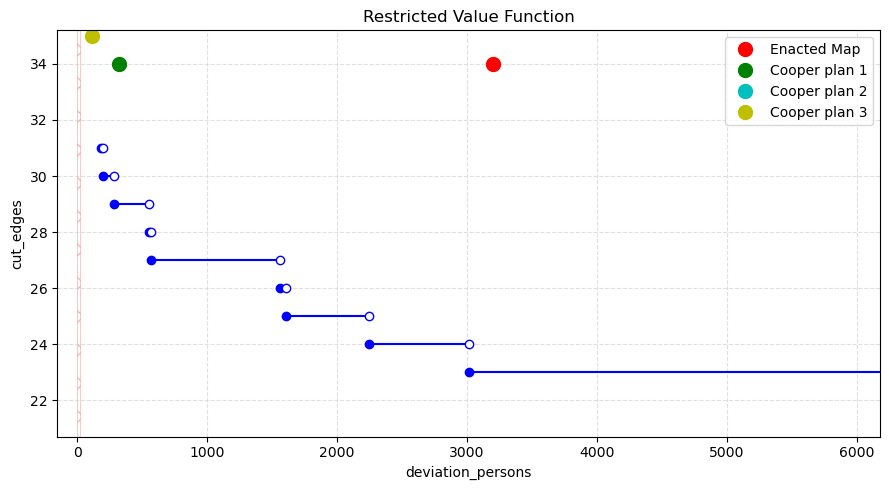

In [9]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             )


####################################################################################################
Pareto maps for state WV, objective cut_edges
####################################################################################################



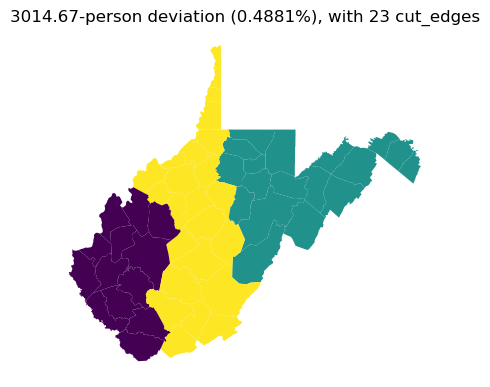

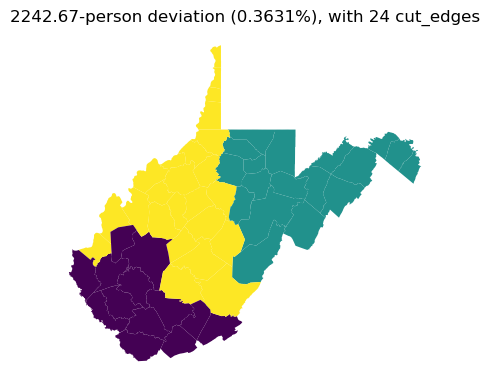

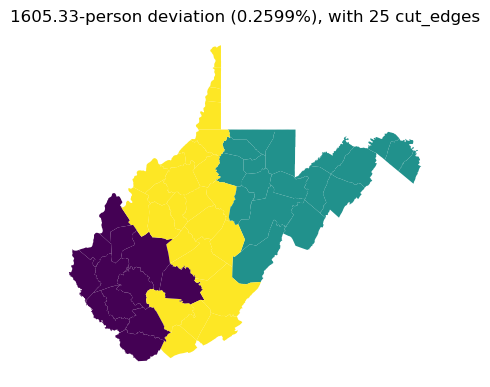

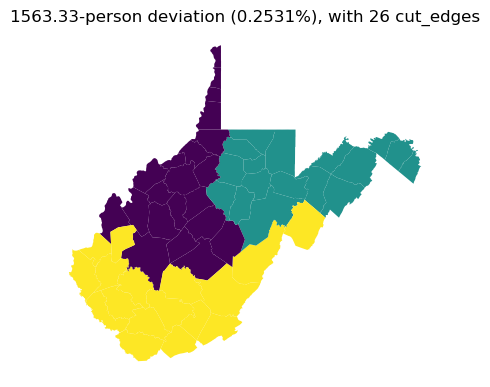

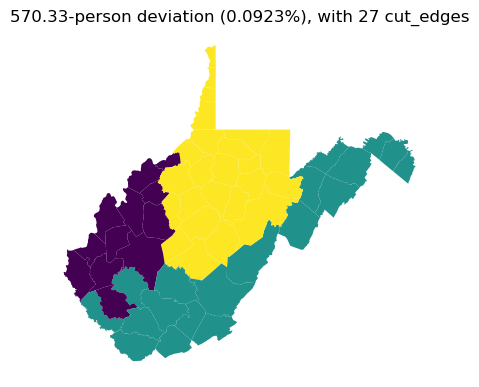

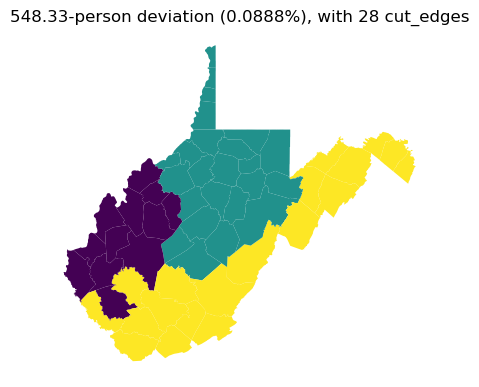

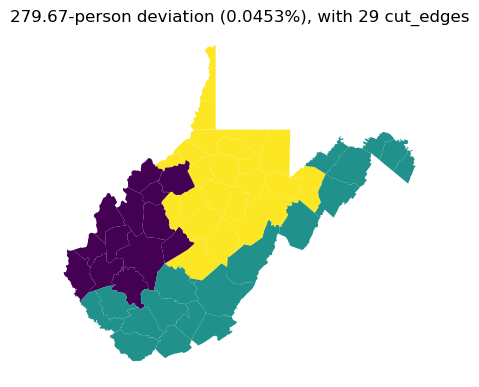

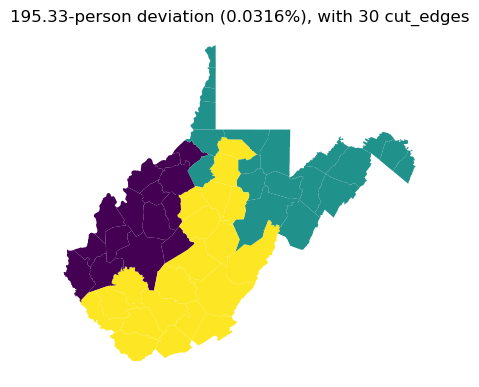

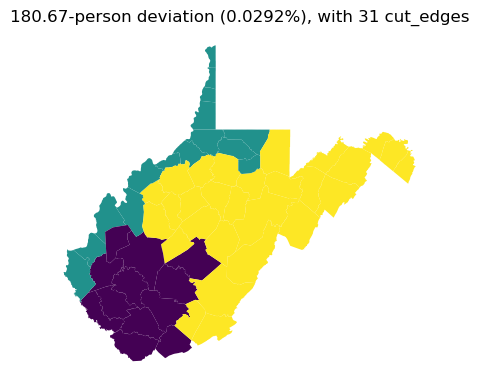

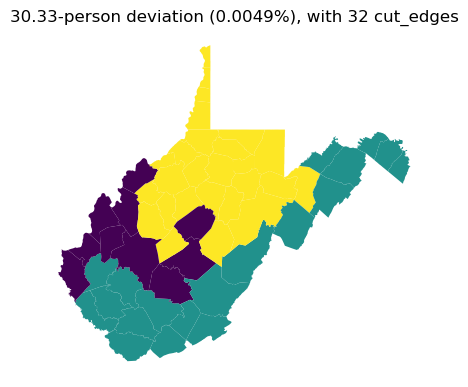

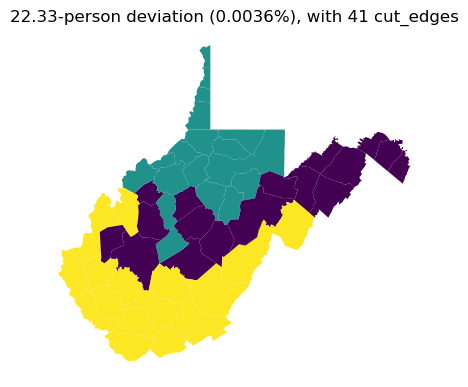

In [10]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)